Uploading kaggle.json file in google colab environment
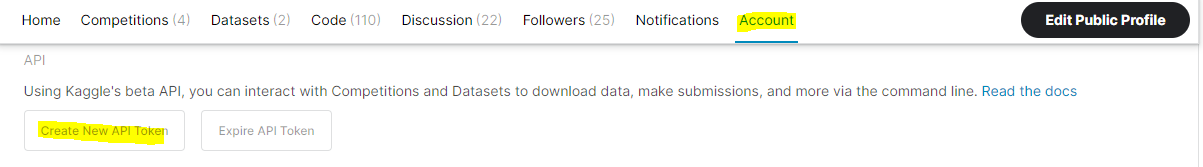

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d kazanova/sentiment140 # dataset API Command
!unzip sentiment140.zip

 69% 56.0M/80.9M [00:00<00:00, 306MB/s]
100% 80.9M/80.9M [00:00<00:00, 310MB/s]
Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


###**Importing Neccesary Libraries**

In [2]:
import pandas as pd
import numpy as np

###**Reading the dataset and adding column names**

In [4]:
data = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding="ISO-8859-1", names = ['sentiment','ids','date','flag','user','text'])

###**EDA**

In [46]:
data.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
len(data)

1600000

In [7]:
data.shape

(1600000, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [9]:
np.sum(data.isnull())

sentiment    0
ids          0
date         0
flag         0
user         0
text         0
dtype: int64

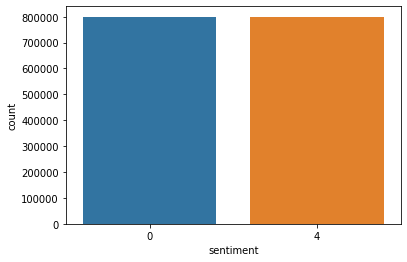

In [10]:
import seaborn as sns
sns.countplot(x='sentiment', data=data)

###**Removing the unnecessary columns**

In [11]:
dataset = data[['sentiment','text']]
dataset.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


###**Replacing the values from 4 to 1**

In [12]:
dataset['sentiment'] = data['sentiment'].replace(4,1)
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


###**Converting data to a list**

In [56]:
text = list(dataset['text'])
sentiment = list(dataset['sentiment'])

In [57]:
text[0:30]

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ',
 "spring break in plain city... it's snowing ",
 'I just re-pierced my ears ',
 "@caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .",
 '@octolinz16 It it counts, idk why I did either. you never talk to me anymore ',
 "@smarrison i wo

In [58]:
sentiment[0:30]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

###**Defining a dictionary with Emojis and their meanings**

In [16]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

###**Defining a list of Stop words**

In [17]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

###**Importing Necessary Libraries**

In [18]:
import re
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Unzipping grammars/book_grammars.zip.
       | Downloading 


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

**Pre-Processing Function**

####The Preprocessing steps taken are:

*Lower Casing the text.<br>
Replacing URLs with "URL".<br>
Replacing Emojis with its value as specified in dictionary.<br>
Replacing Usernames with "USER".<br>
Removing Non-Alphabets.<br>
Replacing Consecutive 3 letters to 2 letters.<br>
Removing Short Words (length less than 2).<br>
Removing Stopwords.<br>
Lemmatizing.<br>*

In [59]:
def preprocess(textdata):
    processedText = []
    
    #creating a Lemmatizer
    wordLemma = WordNetLemmatizer() #define the imported library
    
    # Defining regular expression pattern we can find. in tweets
    Pattern_url        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)" # e.g https://google.com
    Pattern_user       = '@[^\s]+' # e.g @Mihir check this out
    Pattern_alpha      = "[^a-zA-Z0-9]"
    Pattern_sequence   = r"(.)\1\1+"  # e.g Heyyyyyyy, I am back!
    Pattern_seqReplace = r"\1\1" # e.g Replace Heyyyyyyy with Heyy
    
    
    for tweet in textdata:
        tweet = tweet.lower() #lower casing all the text
        
        
        # Replace all URls with 'URL'
        tweet = re.sub(Pattern_url,' URL',tweet) #using the substitution method 
        
        # Replace all emojis.
        for emoji in emojis.keys(): #in each of the looped tweet, replace each emojis with their respective meaning
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])  # emojis[emoji] helps to get the value of the emoji from the dictionary
            
            
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(Pattern_user,' USER', tweet)  #To hide Personal Information, we can replace all usernames with User
        
        
        # Replace all non alphabets.
        tweet = re.sub(Pattern_alpha, " ", tweet) # e.g I am *10 better!
        
        
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(Pattern_sequence, Pattern_seqReplace, tweet) # e.g Replace Heyyyyyyy with Heyy
        
        
        tweetwords = ''
        for word in tweet.split():
            if len(word) > 2 and word.isalpha():
                word = wordLemma.lemmatize(word)
                tweetwords += (word + ' ')
        
        processedText.append(tweetwords)
        
    return processedText

In [60]:
processedtext = preprocess(text)

###**Non-Preprocessed text**

In [61]:
text[0:10]

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ']

###**Preprocessed text**

In [62]:
processedtext[0:10]

['USER URL aww that bummer you shoulda got david carr third day EMOJIwink ',
 'upset that can update his facebook texting and might cry result school today also blah ',
 'USER dived many time for the ball managed save the rest out bound ',
 'whole body feel itchy and like it fire ',
 'USER not behaving all mad why here because can see you all over there ',
 'USER not the whole crew ',
 'need hug ',
 'USER hey long time see yes rain bit only bit lol fine thanks how you ',
 'USER nope they didn have ',
 'USER que muera ']

###**Importing Libraries for Wordcloud**

In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

###**Negative Word WordCloud**

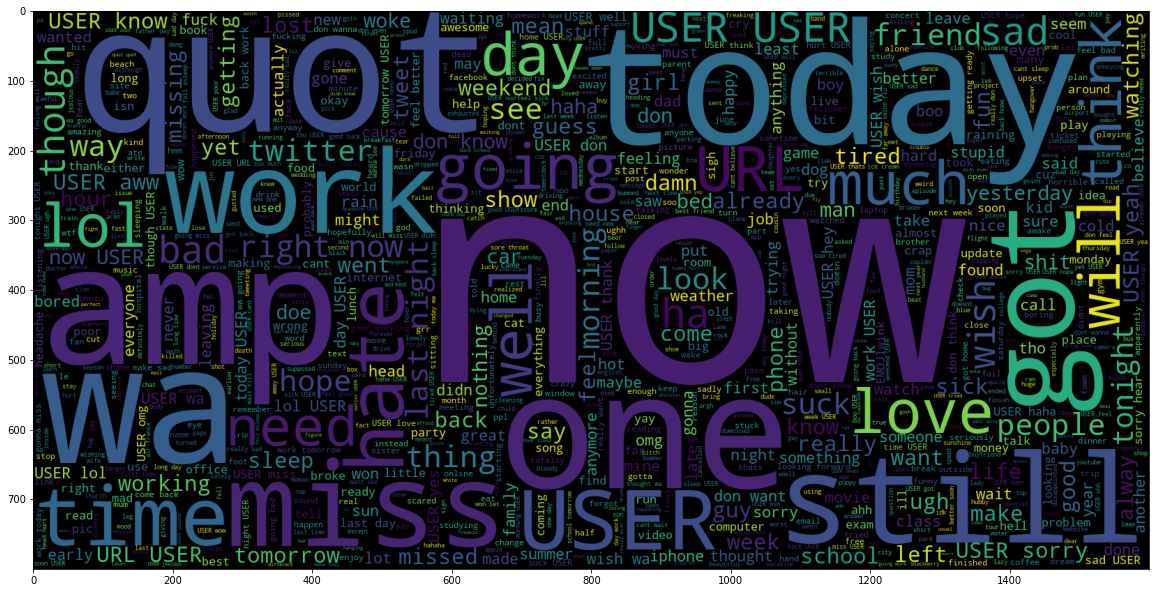

In [64]:
negative_data = processedtext[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(negative_data))
plt.imshow(wc)

###**Positive Word WordCloud**

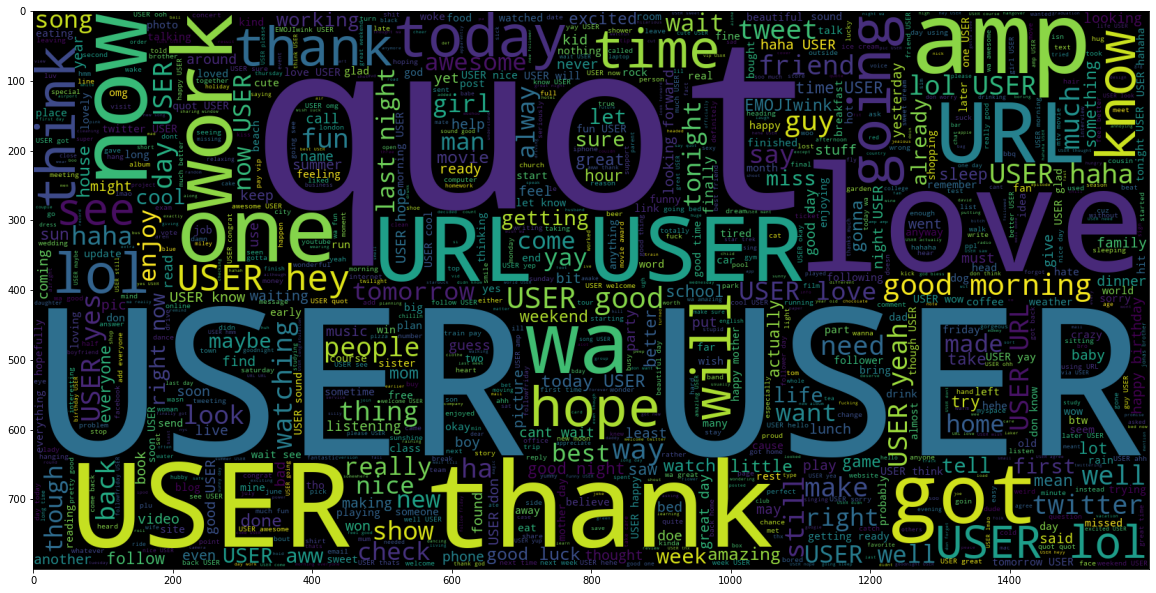

In [65]:
positive_data = processedtext[800000:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(positive_data))
plt.imshow(wc)

###**Importing Libraries for train-test split**

In [66]:
from sklearn.model_selection import train_test_split

**Spliting data into 80:20 ratio**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.2, random_state = 0)

###**Importing the TF-IDF Vectorizer Library**

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

###**Transforming the dataset**

In [70]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

###**Importing the models Library**

In [71]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

###**Creating Custom Function to print Classification Report and Visualize  Confusion Matrix**

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

def print_report(y_pred):
  print(classification_report(y_test, y_pred))

In [73]:
def conf_matrix(y_pred):
      cf_matrix = confusion_matrix(y_test, y_pred)
      categories  = ['Negative','Positive']
      group_names = ['True Neg','False Pos', 'False Neg','True Pos']
      group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
      labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
      labels = np.asarray(labels).reshape(2,2)
      sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                      xticklabels = categories, yticklabels = categories)
      plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
      plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
      plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

###**Bernollis NB Model**

              precision    recall  f1-score   support

           0       0.80      0.79      0.80    159815
           1       0.80      0.81      0.80    160185

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



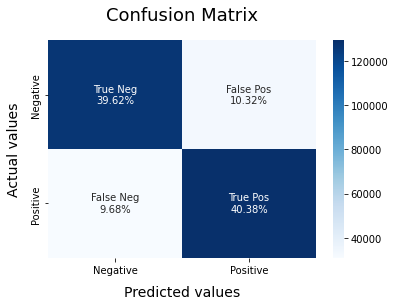

In [74]:
ber_naive = BernoulliNB(alpha = 2)
ber_naive.fit(X_train, y_train)
y_pred_ber_naive = ber_naive.predict(X_test)
print_report(y_pred_ber_naive)
conf_matrix(y_pred_ber_naive)

###**Linear SVC Model**

              precision    recall  f1-score   support

           0       0.81      0.80      0.80    159815
           1       0.80      0.82      0.81    160185

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



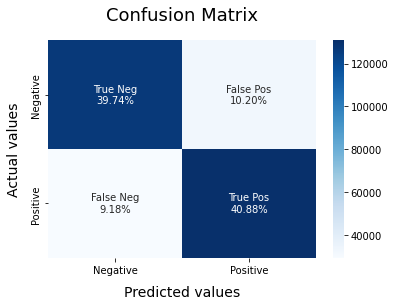

In [76]:
SVC_model = LinearSVC()
SVC_model.fit(X_train, y_train)
y_pred_SVC_model = SVC_model.predict(X_test)
print_report(y_pred_SVC_model)
conf_matrix(y_pred_SVC_model)

###**Logistic Regression Model**

              precision    recall  f1-score   support

           0       0.82      0.81      0.82    159815
           1       0.81      0.83      0.82    160185

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



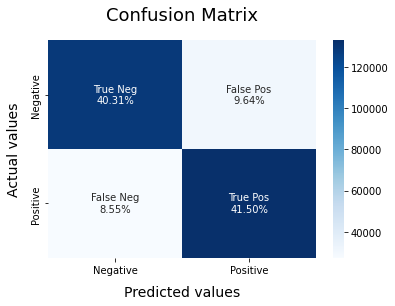

In [78]:
LR_model = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LR_model.fit(X_train, y_train)
y_pred_LR_model = LR_model.predict(X_test)
print_report(y_pred_LR_model)
conf_matrix(y_pred_LR_model)

###**Stocastic Gradient Bossting Classifier**

              precision    recall  f1-score   support

           0       0.79      0.77      0.78    159815
           1       0.78      0.79      0.78    160185

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



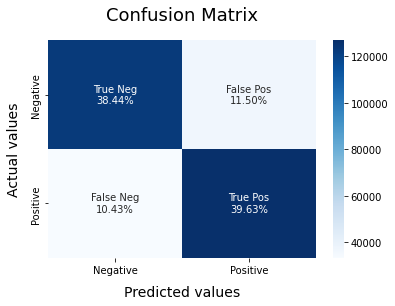

In [80]:
sgd_model = SGDClassifier(max_iter=1000)
sgd_model.fit(X_train,y_train)
y_pred_sgd_model = sgd_model.predict(X_test)
print_report(y_pred_sgd_model)
conf_matrix(y_pred_sgd_model)

###**Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.73      0.77      0.75    159815
           1       0.76      0.71      0.74    160185

    accuracy                           0.74    320000
   macro avg       0.74      0.74      0.74    320000
weighted avg       0.74      0.74      0.74    320000



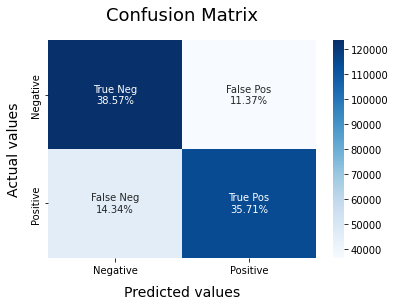

In [82]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15)
rf_model.fit(X_train, y_train)
y_pred_rf_model = rf_model.predict(X_test)
print_report(y_pred_rf_model)
conf_matrix(y_pred_rf_model)

###**Multi-layer Perceptron classifier**

In [84]:
'''mlp_model = MLPClassifier(random_state=1)
mlp_model.fit(X_train, y_train)
y_pred_mlp_model = mlp_model.predict(X_test)
print_report(y_pred_mlp_model)
conf_matrix(y_pred_mlp_model)'''

'mlp_model = MLPClassifier(random_state=1)\nmlp_model.fit(X_train, y_train)\ny_pred_mlp_model = mlp_model.predict(X_test)\nprint_report(y_pred_mlp_model)\nconf_matrix(y_pred_mlp_model)'

##**Conclusion**
###We have built the following models alongside its accuracy:
<li>Bernollis NB Model -- 80 %
<li>Linear SVC Model -- 81 %
<li>Logistic Regression Model -- 82 %
<li>Stocastic GB Classifier -- 78 %
<li>Random Forest -- 74 %

*Looking at the accuracy Logistic Regression is the best performing model followed by Linear SVC also looking at the confusion matrix we can determine that logistic regression is performing the best as compared to the other models.*